<a href="https://colab.research.google.com/github/titsitits/open-image-restoration/blob/master/Colab_Notebooks/Christmas_Truce_Restoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#Ensure you are using a GPU (otherwise change execution mode to GPU)
#You can also verify you have a powerful GPU (P4 < K80 < T4 < P100)
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-e6b3b6ae-86de-0151-b86b-44472622674d)


# Import library, initialize image restorer

In [1]:
import os
from os.path import *
basedir = "/content"

# Import library
repodir = join(basedir,"open-image-restoration")
if not exists(repodir):
  os.chdir(basedir)
  !git clone https://github.com/titsitits/open-image-restoration {repodir}

os.chdir(repodir)

#Todo: create a pip module
#Specific dependencies needed for colorization
!pip install --quiet -r requirements.txt

import ImagePipeline_utils as IP
import ImageRestorer
restorer = ImageRestorer.ImageRestorer()

Cloning into '/content/open-image-restoration'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 400 (delta 0), reused 0 (delta 0), pack-reused 397
Receiving objects: 100% (400/400), 139.59 MiB | 9.39 MiB/s, done.
Resolving deltas: 100% (196/196), done.


# Prepare folders and import some images

In [0]:
#Import some files
inputdir = join(basedir,"input")
IP.initdir(inputdir)
outputdir = join(basedir,"output")
IP.initdir(outputdir)

import_local_files = False

from google.colab import files
os.chdir(inputdir)
if import_local_files:
  files.upload()
else:
  !wget -q -O "1.jpg" "https://upload.wikimedia.org/wikipedia/commons/b/bf/Christmas_Truce_by_Frederic_Villiers.jpg"
  !wget -q -O "2.jpg" "https://upload.wikimedia.org/wikipedia/commons/6/60/Christmas_Truce_3.jpg"
  !wget -q -O "3.jpg" "https://upload.wikimedia.org/wikipedia/commons/2/20/Weihachtsfriede.jpg"
  !wget -q -O "4.jpg" "https://upload.wikimedia.org/wikipedia/commons/c/ce/The_Christmas_Truce_on_the_Western_Front%2C_1914_Q50721.jpg"
os.chdir(basedir)

# Full process

In [3]:
#Todo: make restorer available from outside repo directory
os.chdir(repodir)
#Todo: improve log handling
raising = False

# Restore images
restorer.preprocess(inputdir, outputdir, gray=True)
restorer.remove_stripes(raising=raising, process_args="-n 2") #reduce image moire (n iterations)
restorer.denoise(raising=raising) #remove image grain
restorer.remove_stripes(raising=raising, process_args="-n 2") #reduce remaining image moire (n iterations)
restorer.colorize(raising=raising) #colorize image
restorer.super_resolution(raising=raising) #upsample image

Image preprocessing...: finished in 0.2098 s
Removing stripes...: finished in 10.1254 s
Removing gaussian noise...: finished in 69.3696 s
Removing stripes...: finished in 10.3388 s
Colorizing...: finished in 704.3708 s
Super-resolving...: finished in 19.5216 s


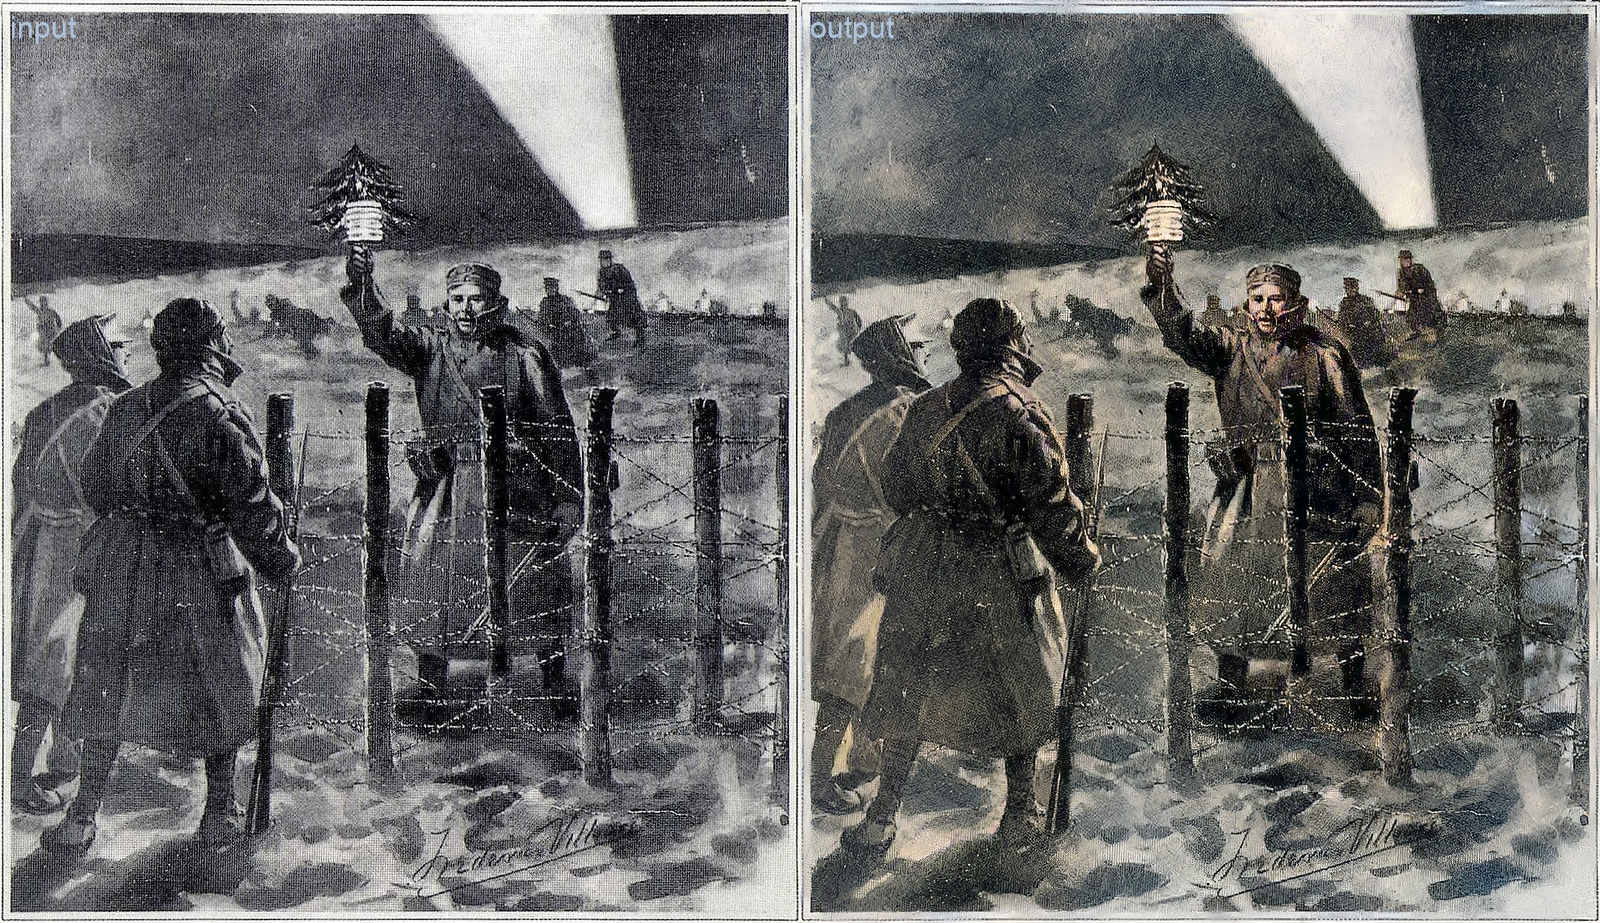

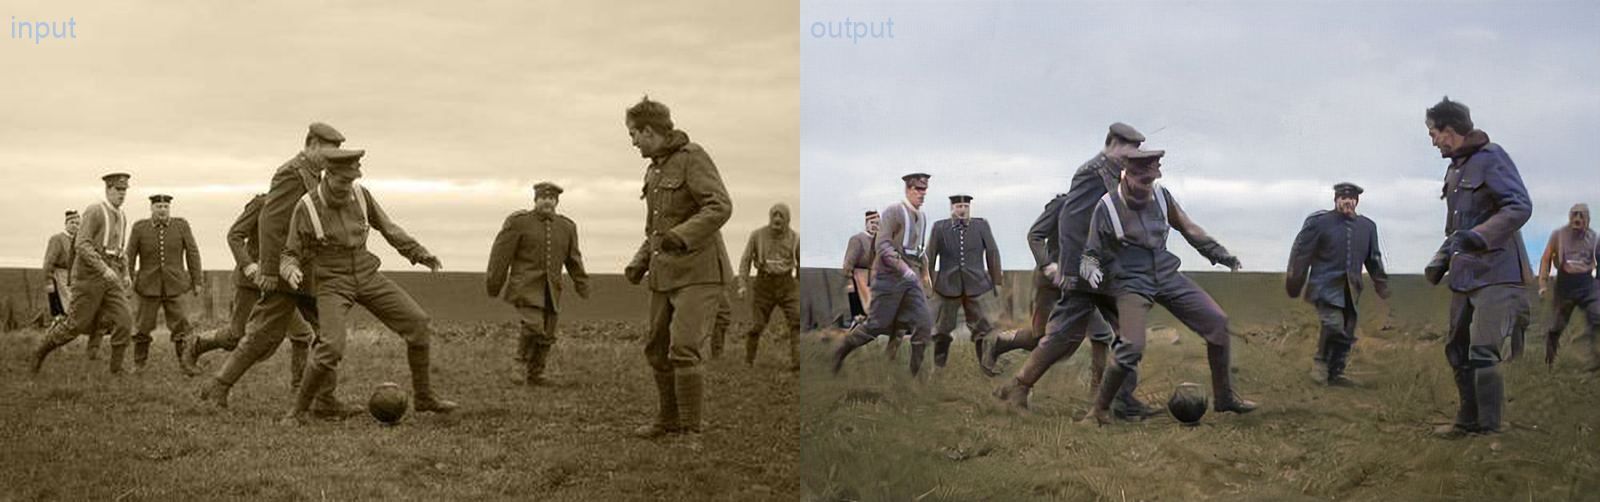

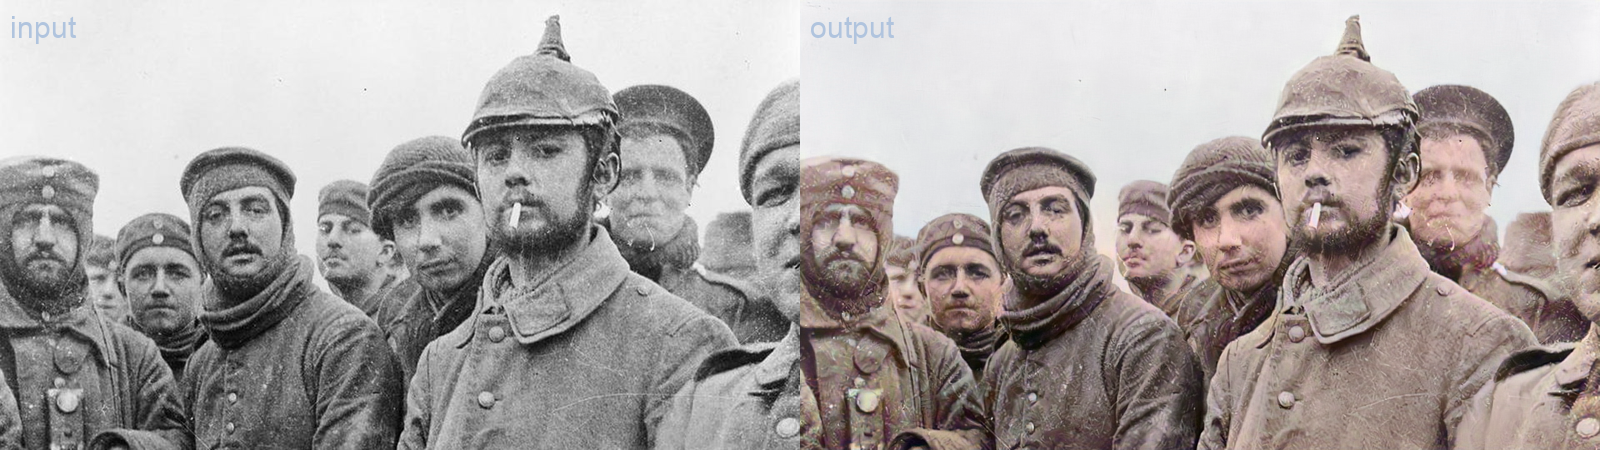

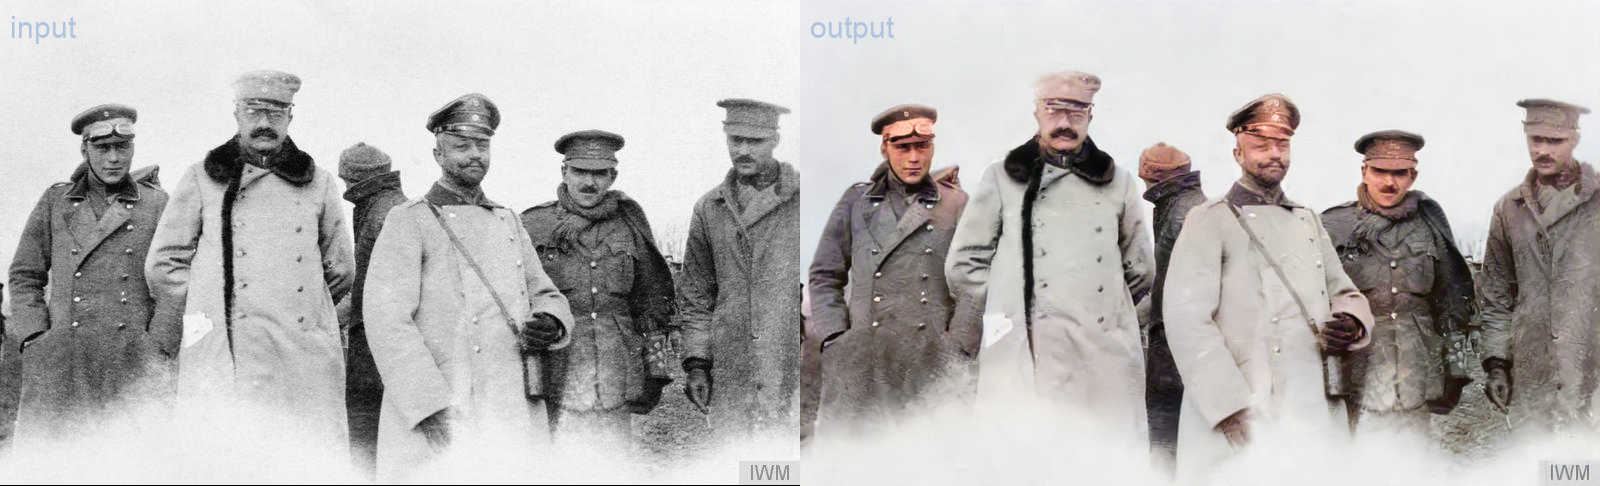

In [7]:
IP.compare_folders([inputdir, outputdir], imagewidth=800, sameheight = False)

In [0]:
#print("Before:")
#IP.display_folder(inputdir, imageheight=600)
#print("After:")
#restorer.display(imageheight = 600)